In [2]:
!pip install transformers==3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 754.6/754.6 kB 4.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 28.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.12.1
    Uninstalling tokenizers-0.12.1:
      Successfully uninstalled tokenizers-0.12.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.20.1
    Uninstalling transformers-4.20.1:
      Successfully uninstalled transformers-4.20.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
allennlp 2.10.1 requires transformers<4.21,>=4.1, but you have transformers 3.0.0 which is incompatible.


In [3]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


2023-01-15 02:05:11.496570: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-15 02:05:12.020839: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-15 02:05:12.022175: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-15 02:05:12.155138: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [4]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 2 GPU(s) available.
We will use the GPU: Tesla T4


In [5]:
# Importing stock ml libraries
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split

import transformers
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertModel, BertConfig

The current process just got forked. Disabling parallelism to avoid deadlocks...
To disable this warning, please explicitly set TOKENIZERS_PARALLELISM=(true | false)
The current process just got forked. Disabling parallelism to avoid deadlocks...
To disable this warning, please explicitly set TOKENIZERS_PARALLELISM=(true | false)


wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


The current process just got forked. Disabling parallelism to avoid deadlocks...
To disable this warning, please explicitly set TOKENIZERS_PARALLELISM=(true | false)


In [6]:
raw_data_path = "/kaggle/input/newdataset/short_resume_dataset_entities.csv"
# destination_folder = '/content/'

df_raw =  pd.read_csv(raw_data_path)
# df_raw = df_raw.head(1000)
df_raw

,Text,Skills,Education,Experience,Additional_Information,Software_Developer,Front_End_Developer,Network_Administrator,Web_Developer,Project_manager,Database_Administrator,Security_Analyst,Systems_Administrator,Python_Developer,Java_Developer
0,Database Administrator Database Administrator ...,Database Sql server 2012 Sql queries Database ...,Bachelor of Science Lead City University July ...,Database Administrator Family Private Care LLC...,SKILLS Installation and Building Server Runnin...,0,0,0,0,0,1,0,0,0,0
1,Database Administrator Database Administrator ...,System organization Assembly Language C C#...,bsc in computer science lagos state university...,Database Administrator Intercontinental Regist...,NaN,0,0,0,0,0,1,0,0,0,0
2,Oracle Database Administrator Oracle Database ...,DATAGUARD (3 years) DATABASES ORACLE (4 years)...,Master of Computer Applications in Science and...,Oracle Database Administrator Cognizant - Hyde...,Skills Operating Systems Red Hat Enterprise Li...,0,0,0,0,0,1,0,0,0,0
3,Amazon Redshift Administrator and ETL Develope...,Datastage Business Intelligence microsoft off...,Bachelor in Computer Science University of Inf...,Amazon Redshift Administrator and ETL Develope...,Proficent in data modeling and database desig...,0,0,0,0,0,1,0,0,0,0
4,Scrum Master Scrum Master Scrum Master Richmon...,Rman Sql Agile Scrum Ux Jira Scrum Master Sun ...,Virginia Commomwealth University - Richmond VA...,Scrum Master Quest Technologies - Washington D...,TECHNICAL PROFICIENCIES Tools and Utilites RM...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29775,ServiceNow Developer ServiceNow Developer Serv...,Database Oracle Javascript Pl/sql Ms access Sq...,Bachelor of Technology in Information Technolo...,ServiceNow Developer Vertex Pharmaceuticals - ...,Skill set ServiceNow Location Boston M E-mail ...,1,0,0,1,0,0,0,0,0,1
29776,Android Developer Android Developer Android De...,Android Database Retrofit Visual studio Javasc...,NaN,Android Developer HCL America/Samsung Septembe...,Over 9 years of experience in mobile and web ...,1,0,0,1,0,0,0,0,0,0
29777,UI Developer UI Developer UI Developer - Cotiv...,D3.js Bootstrap Visual studio Javascript Git,Masters,UI Developer Cotiviti Health Care November 201...,NaN,1,1,0,1,0,0,0,0,0,0
29778,Web Developer Web Developer Los Angeles CA Wor...,Wordpress Javascript Front End PHP,Associate,Web Developer self employed September 2013 to ...,NaN,1,0,0,1,0,0,0,0,0,0


In [7]:
(df_raw[df_raw['Skills'].isna()]).count()

Text                      4134
Skills                       0
Education                 3563
Experience                4133
Additional_Information    1482
Software_Developer        4134
Front_End_Developer       4134
Network_Administrator     4134
Web_Developer             4134
Project_manager           4134
Database_Administrator    4134
Security_Analyst          4134
Systems_Administrator     4134
Python_Developer          4134
Java_Developer            4134
dtype: int64

In [8]:
df_raw[df_raw['Skills'].isna()]

,Text,Skills,Education,Experience,Additional_Information,Software_Developer,Front_End_Developer,Network_Administrator,Web_Developer,Project_manager,Database_Administrator,Security_Analyst,Systems_Administrator,Python_Developer,Java_Developer
15,DBA DBA DBA Over 6 Six years of professional ...,NaN,Associate,DBA 2014 to 2016 2012 2008/R2 in DEV TEST and ...,NaN,0,0,0,0,0,1,0,0,0,0
24,Database Administrator contractor Database Adm...,NaN,Biology HOWARD UNIVERSITY - Washington DC 2006...,Database Administrator contractor ISHGLO-ONE C...,COMPUTER SKILLS Microsoft Windows Word Excel P...,0,0,0,0,0,1,0,0,0,0
46,Senior Database Administrator Senior Database ...,NaN,NaN,Senior Database Administrator AppLab Systems I...,Technical Skills Operating system AIX UNIX Li...,0,0,0,0,0,1,0,0,0,0
49,SQL Server Database Administrator SQL Server D...,NaN,Bachelors,SQL Server Database Administrator Pricewaterho...,NaN,0,0,0,0,0,1,0,0,0,0
50,Sr.SQL Server Database Administrator Sr.SQL Se...,NaN,Bachelors,Sr.SQL Server Database Administrator Cox Enter...,NaN,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29732,Front-End Development and QA Intern Front-End ...,NaN,Bachelors degree in Computer Science in Comput...,Front-End Development and QA Intern Altair IoT...,NaN,1,1,0,1,0,0,0,0,0,0
29736,Senior .Net Developer Senior .Net Developer Se...,NaN,Bachelors Bachelors Bachelors,Senior .Net Developer Fahrenheit IT - Chicago ...,NaN,1,0,0,1,0,0,0,0,0,0
29737,Sr. Android Developer Sr. Android Developer Sr...,NaN,MS in Computer Science University Of Delaware,Sr. Android Developer General Electric - Charl...,NaN,1,0,0,1,0,0,0,0,0,0
29770,Sr .Net Web Developer Sr .Net Web Developer Ri...,NaN,Masters,Sr .Net Web Developer Ups Freight October 2013...,NaN,1,0,0,1,0,0,0,0,0,0


In [9]:
df_raw = df_raw[df_raw['Skills'].notna()]

In [10]:
df_raw[df_raw['Experience'].isna()] 

,Text,Skills,Education,Experience,Additional_Information,Software_Developer,Front_End_Developer,Network_Administrator,Web_Developer,Project_manager,Database_Administrator,Security_Analyst,Systems_Administrator,Python_Developer,Java_Developer
7429,Job Seeker Associate Director Program Manageme...,Program management Process improvement Mitigat...,Master of Professional Studies in Enterprise A...,NaN,EXPERTISE Budget Management Process Improveme...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_raw = df_raw[df_raw['Experience'].notna()]

In [43]:
df_raw.shape

(25645, 16)

In [44]:
df_raw.columns

Index(['Text', 'Skills', 'Education', 'Experience', 'Additional_Information',
       'Software_Developer', 'Front_End_Developer', 'Network_Administrator',
       'Web_Developer', 'Project_manager', 'Database_Administrator',
       'Security_Analyst', 'Systems_Administrator', 'Python_Developer',
       'Java_Developer', 'target_list'],
      dtype='object')

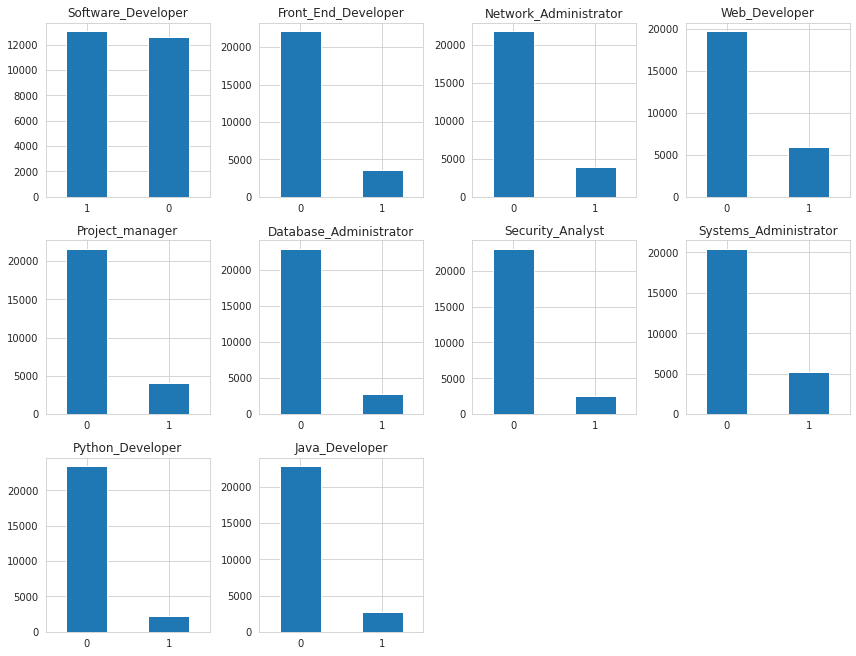

In [66]:
classes = ['Software_Developer', 'Front_End_Developer',
       'Network_Administrator', 'Web_Developer', 'Project_manager',
       'Database_Administrator', 'Security_Analyst', 'Systems_Administrator',
       'Python_Developer', 'Java_Developer']

# for label in classes:
#     print(df[label].value_counts())
    
import math
from matplotlib import pyplot as plt

size = math.ceil(df_raw.shape[1]** (1/2))
fig = plt.figure(figsize=(12, 12))
# plt.figure(figsize=(10, 10))

for i, col in enumerate(classes):
    fig.add_subplot(size, size, i + 1)
    df[col].value_counts().plot(kind="bar", ax=plt.gca(), title=col, rot=0)

fig.tight_layout()

In [14]:
df_raw['target_list'] = df_raw[['Software_Developer', 'Front_End_Developer',
       'Network_Administrator', 'Web_Developer', 'Project_manager',
       'Database_Administrator', 'Security_Analyst', 'Systems_Administrator',
       'Python_Developer', 'Java_Developer']].values.tolist()

In [15]:
df = df_raw[['Software_Developer', 'Front_End_Developer',
       'Network_Administrator', 'Web_Developer', 'Project_manager',
       'Database_Administrator', 'Security_Analyst', 'Systems_Administrator',
       'Python_Developer', 'Java_Developer']]
df['target_list'] = df_raw[['Software_Developer', 'Front_End_Developer',
       'Network_Administrator', 'Web_Developer', 'Project_manager',
       'Database_Administrator', 'Security_Analyst', 'Systems_Administrator',
       'Python_Developer', 'Java_Developer']].values.tolist()
df['Skills+Experience'] = df_raw['Skills']+" "+df_raw['Experience']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


In [16]:
# df['RolesSkills'] = [''.join(l) for l in df_raw['Roles_Skills']]
# df['RolesSkills'] = df_raw['Roles_Skills'].apply(eval).apply(' '.join)
# # df['RolesSkills'] = df_raw['Roles_Skills'].apply(lambda x: ''.join(x))
# df['Skills+Experience'] = df['RolesSkills']+" "+df_raw['Experience']
# df['Experience']=df_raw['Experience']

In [17]:
df

,Software_Developer,Front_End_Developer,Network_Administrator,Web_Developer,Project_manager,Database_Administrator,Security_Analyst,Systems_Administrator,Python_Developer,Java_Developer,target_list,Skills+Experience
0,0,0,0,0,0,1,0,0,0,0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",Database Sql server 2012 Sql queries Database ...
1,0,0,0,0,0,1,0,0,0,0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",System organization Assembly Language C C#...
2,0,0,0,0,0,1,0,0,0,0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",DATAGUARD (3 years) DATABASES ORACLE (4 years)...
3,0,0,0,0,0,1,0,0,0,0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",Datastage Business Intelligence microsoft off...
4,0,0,0,0,0,1,0,0,0,0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]",Rman Sql Agile Scrum Ux Jira Scrum Master Sun ...
...,...,...,...,...,...,...,...,...,...,...,...,...
29775,1,0,0,1,0,0,0,0,0,1,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 1]",Database Oracle Javascript Pl/sql Ms access Sq...
29776,1,0,0,1,0,0,0,0,0,0,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 0]",Android Database Retrofit Visual studio Javasc...
29777,1,1,0,1,0,0,0,0,0,0,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0]",D3.js Bootstrap Visual studio Javascript Git U...
29778,1,0,0,1,0,0,0,0,0,0,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 0]",Wordpress Javascript Front End PHP Web Develop...


In [18]:
# df['WORD_COUNT'] = df['Experience'].apply(lambda x: len(x.split()))

In [19]:
# df_raw.hist('WORD_COUNT', bins=30)

In [20]:
df2 = df[['Skills+Experience', 'target_list']].copy()
df2['Skills+Experience'][1]

' System organization  Assembly Language  C  C#  Microsoft PowerPoint Hardware/Systems Design  Visual basic and java programming   Microsoft excel.  Windows XP SQL  Digital Electronics  Microsoft office Microprocessors   Microsoft Windows 7 Database Administrator Intercontinental Registry - Lagos GU December 2008 to August 2011 Responsibilities Key responsibilities.'

In [21]:
df2

,Skills+Experience,target_list
0,Database Sql server 2012 Sql queries Database ...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
1,System organization Assembly Language C C#...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
2,DATAGUARD (3 years) DATABASES ORACLE (4 years)...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
3,Datastage Business Intelligence microsoft off...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
4,Rman Sql Agile Scrum Ux Jira Scrum Master Sun ...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
...,...,...
29775,Database Oracle Javascript Pl/sql Ms access Sq...,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 1]"
29776,Android Database Retrofit Visual studio Javasc...,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
29777,D3.js Bootstrap Visual studio Javascript Git U...,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0]"
29778,Wordpress Javascript Front End PHP Web Develop...,"[1, 0, 0, 1, 0, 0, 0, 0, 0, 0]"


In [22]:
# # Sections of config

# # Defining some key variables that will be used later on in the training
# MAX_LEN = 256
# TRAIN_BATCH_SIZE = 32
# VALID_BATCH_SIZE = 32
# EPOCHS = 4
# LEARNING_RATE = 1e-05

# import torch
# from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
# # model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

# # inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
# # with torch.no_grad():
# #     logits = model(**inputs).logits

# # predicted_class_id = logits.argmax().item()
# # model.config.id2label[predicted_class_id]

# # tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [23]:
# Sections of config

# Defining some key variables that will be used later on in the training
MAX_LEN = 256
TRAIN_BATCH_SIZE = 32
VALID_BATCH_SIZE = 32
EPOCHS = 4
LEARNING_RATE = 1e-05
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [24]:
class CustomDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe['Skills+Experience']
        self.targets = self.data.target_list
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True,
            truncation=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [25]:
train_size = 0.8
train_dataset = df2.sample(frac=train_size,random_state=200)
valid_dataset = df2.drop(train_dataset.index).reset_index(drop=True)
train_dataset = train_dataset.reset_index(drop=True)


print("FULL Dataset: {}".format(df2.shape))
print("TRAIN Dataset: {}".format(train_dataset.shape))
print("TEST Dataset: {}".format(valid_dataset.shape))

training_set = CustomDataset(train_dataset, tokenizer, MAX_LEN)
validation_set = CustomDataset(valid_dataset, tokenizer, MAX_LEN)

FULL Dataset: (25645, 2)
TRAIN Dataset: (20516, 2)
TEST Dataset: (5129, 2)


In [26]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': False,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
validation_loader = DataLoader(validation_set, **test_params)

In [27]:
len(training_loader)

642

In [28]:
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
#         self.l1 = transformers.DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")
        self.l1 = transformers.BertModel.from_pretrained('bert-base-uncased')
        self.l2 = torch.nn.Dropout(0.3)
        self.l3 = torch.nn.Linear(768, 10)
    
    def forward(self, ids, mask, token_type_ids):
        _, output_1= self.l1(ids, attention_mask = mask, token_type_ids = token_type_ids)
        output_2 = self.l2(output_1)
        output = self.l3(output_2)
        return output

model = BERTClass()
model.to(device)

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERTClass(
  (l1): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    

In [29]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [30]:
len(training_loader)

642

In [31]:
def load_ckp(checkpoint_fpath, model, optimizer):
    """
    checkpoint_path: path to save checkpoint
    model: model that we want to load checkpoint parameters into       
    optimizer: optimizer we defined in previous training
    """
    # load check point
    checkpoint = torch.load(checkpoint_fpath)
    # initialize state_dict from checkpoint to model
    model.load_state_dict(checkpoint['state_dict'])
    # initialize optimizer from checkpoint to optimizer
    optimizer.load_state_dict(checkpoint['optimizer'])
    # initialize valid_loss_min from checkpoint to valid_loss_min
    valid_loss_min = checkpoint['valid_loss_min']
    # return model, optimizer, epoch value, min validation loss 
    return model, optimizer, checkpoint['epoch'], valid_loss_min.item()

In [32]:
import shutil, sys   
def save_ckp(state, is_best, checkpoint_path, best_model_path):
    """
    state: checkpoint we want to save
    is_best: is this the best checkpoint; min validation loss
    checkpoint_path: path to save checkpoint
    best_model_path: path to save best model
    """
    f_path = checkpoint_path
    # save checkpoint data to the path given, checkpoint_path
    torch.save(state, f_path)
    # if it is a best model, min validation loss
    if is_best:
        best_fpath = best_model_path
        # copy that checkpoint file to best path given, best_model_path
        shutil.copyfile(f_path, best_fpath)

In [33]:
#to use as global variables
val_targets=[]
val_outputs=[] 

In [34]:
def train_model(start_epochs,  n_epochs, valid_loss_min_input, 
                training_loader, validation_loader, model, 
                optimizer, checkpoint_path, best_model_path):
   
  # initialize tracker for minimum validation loss
  valid_loss_min = valid_loss_min_input 
   
 
  for epoch in range(start_epochs, n_epochs+1):
    train_loss = 0
    valid_loss = 0

    model.train()
    print('############# Epoch {}: Training Start   #############'.format(epoch))
    for batch_idx, data in enumerate(training_loader):
        #print('yyy epoch', batch_idx)
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        outputs = model(ids, mask, token_type_ids)

        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        #if batch_idx%5000==0:
         #   print(f'Epoch: {epoch}, Training Loss:  {loss.item()}')
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #print('before loss data in training', loss.item(), train_loss)
        train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.item() - train_loss))
        #print('after loss data in training', loss.item(), train_loss)
    
    print('############# Epoch {}: Training End     #############'.format(epoch))
    
    print('############# Epoch {}: Validation Start   #############'.format(epoch))
    ######################    
    # validate the model #
    ######################
 
    model.eval()
   
    with torch.no_grad():
      for batch_idx, data in enumerate(validation_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)

            loss = loss_fn(outputs, targets)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.item() - valid_loss))
            val_targets.extend(targets.cpu().detach().numpy().tolist())
            val_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())

      print('############# Epoch {}: Validation End     #############'.format(epoch))
      # calculate average losses
      #print('before cal avg train loss', train_loss)
      train_loss = train_loss/len(training_loader)
      valid_loss = valid_loss/len(validation_loader)
      # print training/validation statistics 
      print('Epoch: {} \tAvgerage Training Loss: {:.6f} \tAverage Validation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
      
      # create checkpoint variable and add important data
      checkpoint = {
            'epoch': epoch + 1,
            'valid_loss_min': valid_loss,
            'state_dict': model.state_dict(),
            'optimizer': optimizer.state_dict()
      }
        
        # save checkpoint
      save_ckp(checkpoint, False, checkpoint_path, best_model_path)
        
      ## TODO: save the model if validation loss has decreased
      if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))
        # save checkpoint as best model
        save_ckp(checkpoint, True, checkpoint_path, best_model_path)
        valid_loss_min = valid_loss

    print('############# Epoch {}  Done   #############\n'.format(epoch))


  return model

In [35]:
checkpoint_path = '/kaggle/working/current_checkpoint.pt'
best_model = '/kaggle/working/best_model.pt'
trained_model = train_model(1, 5, np.Inf, training_loader, validation_loader, model, optimizer, checkpoint_path, best_model)

############# Epoch 1: Training Start   #############
############# Epoch 1: Training End     #############
############# Epoch 1: Validation Start   #############
############# Epoch 1: Validation End     #############
Epoch: 1 	Avgerage Training Loss: 0.000460 	Average Validation Loss: 0.001251
Validation loss decreased (inf --> 0.001251).  Saving model ...
############# Epoch 1  Done   #############

############# Epoch 2: Training Start   #############
############# Epoch 2: Training End     #############
############# Epoch 2: Validation Start   #############
############# Epoch 2: Validation End     #############
Epoch: 2 	Avgerage Training Loss: 0.000296 	Average Validation Loss: 0.001075
Validation loss decreased (0.001251 --> 0.001075).  Saving model ...
############# Epoch 2  Done   #############

############# Epoch 3: Training Start   #############
############# Epoch 3: Training End     #############
############# Epoch 3: Validation Start   #############
############# Epo

In [36]:
val_preds = (np.array(val_outputs) > 0.5).astype(int)
val_preds

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [37]:
accuracy = metrics.accuracy_score(val_targets, val_preds)
f1_score_micro = metrics.f1_score(val_targets, val_preds, average='micro')
f1_score_macro = metrics.f1_score(val_targets, val_preds, average='macro')
print(f"Accuracy Score = {accuracy}")
print(f"F1 Score (Micro) = {f1_score_micro}")
print(f"F1 Score (Macro) = {f1_score_macro}")

Accuracy Score = 0.5675960226164944
F1 Score (Micro) = 0.8193864972501421
F1 Score (Macro) = 0.7915404661422


In [38]:
from sklearn.metrics import multilabel_confusion_matrix as mcm, classification_report

In [39]:
cm_labels = ['Software_Developer', 'Front_End_Developer',
       'Network_Administrator', 'Web_Developer', 'Project_manager',
       'Database_Administrator', 'Security_Analyst', 'Systems_Administrator',
       'Python_Developer', 'Java_Developer']
    
cm = mcm(val_targets, val_preds)

In [40]:
print(classification_report(val_targets, val_preds))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     12915
           1       0.86      0.71      0.78      3490
           2       0.92      0.61      0.73      3890
           3       0.77      0.67      0.72      5820
           4       0.87      0.69      0.77      3860
           5       0.88      0.66      0.76      2685
           6       0.90      0.69      0.79      2855
           7       0.86      0.67      0.76      5200
           8       0.93      0.83      0.87      2220
           9       0.89      0.74      0.81      2680

   micro avg       0.89      0.76      0.82     45615
   macro avg       0.88      0.72      0.79     45615
weighted avg       0.89      0.76      0.82     45615
 samples avg       0.84      0.76      0.78     45615



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns


def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    axes.set_xlabel('True label')
    axes.set_ylabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)

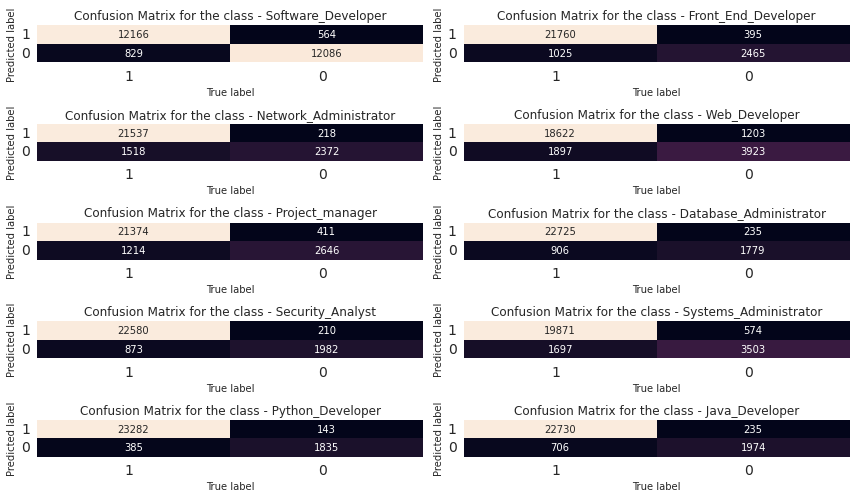

In [42]:
#print_confusion_matrix(mcm(targets, val_preds),class_label=labels, class_names=labels)
sns.set_style("whitegrid")
fig, ax = plt.subplots(5, 2, figsize=(12, 7))
for axes, cfs_matrix, label in zip(ax.flatten(), cm, cm_labels):
  print_confusion_matrix(cfs_matrix, axes, label, ["1", "0"])
    
fig.tight_layout()
plt.show()